In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
df = pd.read_csv('Iris.csv')
df.set_index('Id',inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
X = df.iloc[:,:-1].values

In [16]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=20)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.46400663145228,
 30.077530998389697,
 27.871428665537366,
 26.167857236965936]

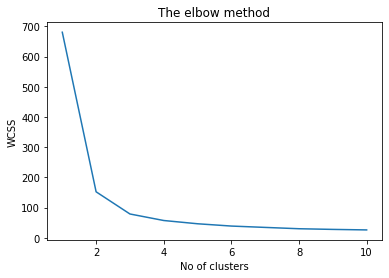

In [17]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()
 

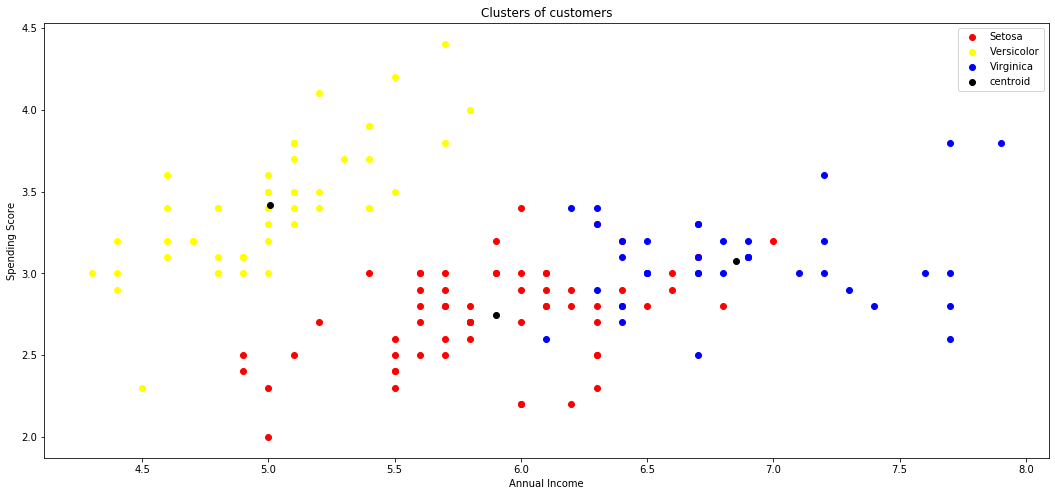

In [23]:
kmeans = KMeans(n_clusters=3, random_state=20)
y_means = kmeans.fit_predict(X)

plt.figure(figsize=(18,8))
plt.scatter(X[y_means==0,0],X[y_means==0,1],c='red',label='Setosa')
plt.scatter(X[y_means==1,0],X[y_means==1,1],c='yellow',label='Versicolor')
plt.scatter(X[y_means==2,0],X[y_means==2,1],c='blue',label='Virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', label='centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()